In [1]:
import numpy as np
from scipy.ndimage.filters import generic_filter as gf
from PIL import Image
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import scipy.stats.mstats as ms
import scipy.ndimage.morphology as morph
Image.MAX_IMAGE_PIXELS = None
import math
import sys
sys.path.append("..") 
from helper import index as helpers
from helper import fast as fastHelpers
from collections import deque
from sklearn.preprocessing import normalize

In [2]:
slope = np.load("../../Raw_Data_21_zones/Slope_14.npy")

In [3]:
ditches = np.load("../../Raw_Data_21_zones/Labels3m_14.npy")

In [4]:
impoundment = np.load("../../Raw_Data_21_zones/Impoundment_14.npy")

In [5]:
hpmf = np.load("../../Raw_Data_21_zones/HPMF_14.npy")

In [6]:
skyView = np.load("../../Raw_Data_21_zones/SkyViewFactor_14.npy")

In [7]:
DEM = np.load("../../Raw_Data_21_zones/DEM_10.npy")

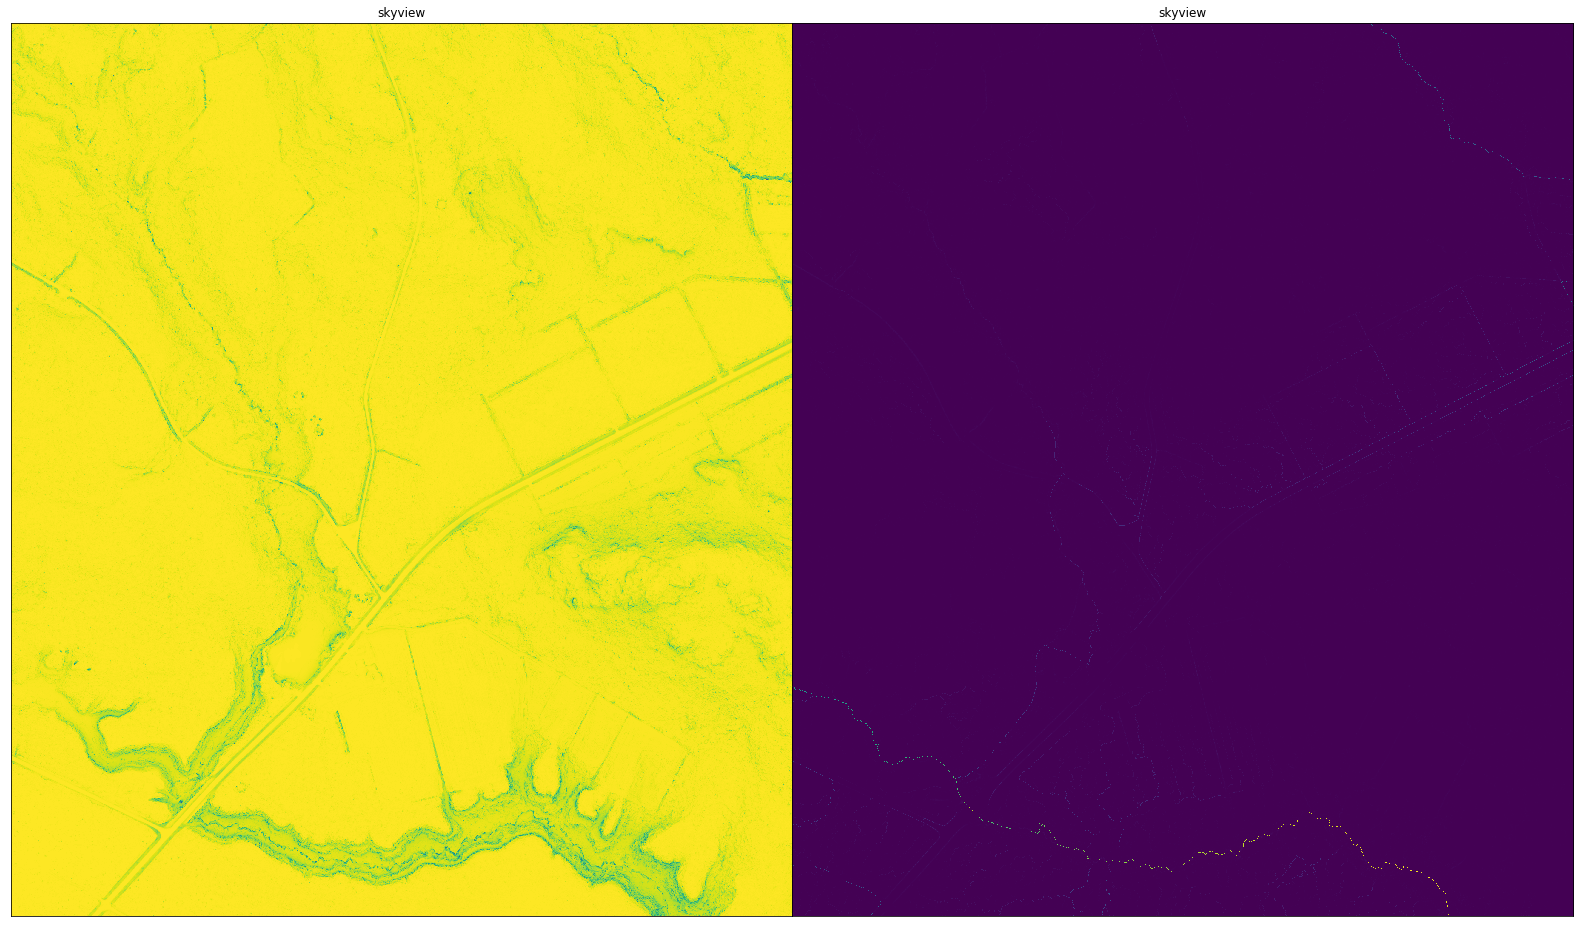

In [8]:
plt.figure(num=None, figsize=(28,32), facecolor='w', edgecolor='k')
ax = [plt.subplot(1,2,i+1) for i in range(2)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0.1)

ax[0].title.set_text("skyview")
ax[0].imshow(skyView)
ax[1].title.set_text("skyview")
ax[1].imshow(impoundment)

In [9]:
smoothedOut = helpers.streamAmplification(impoundment)

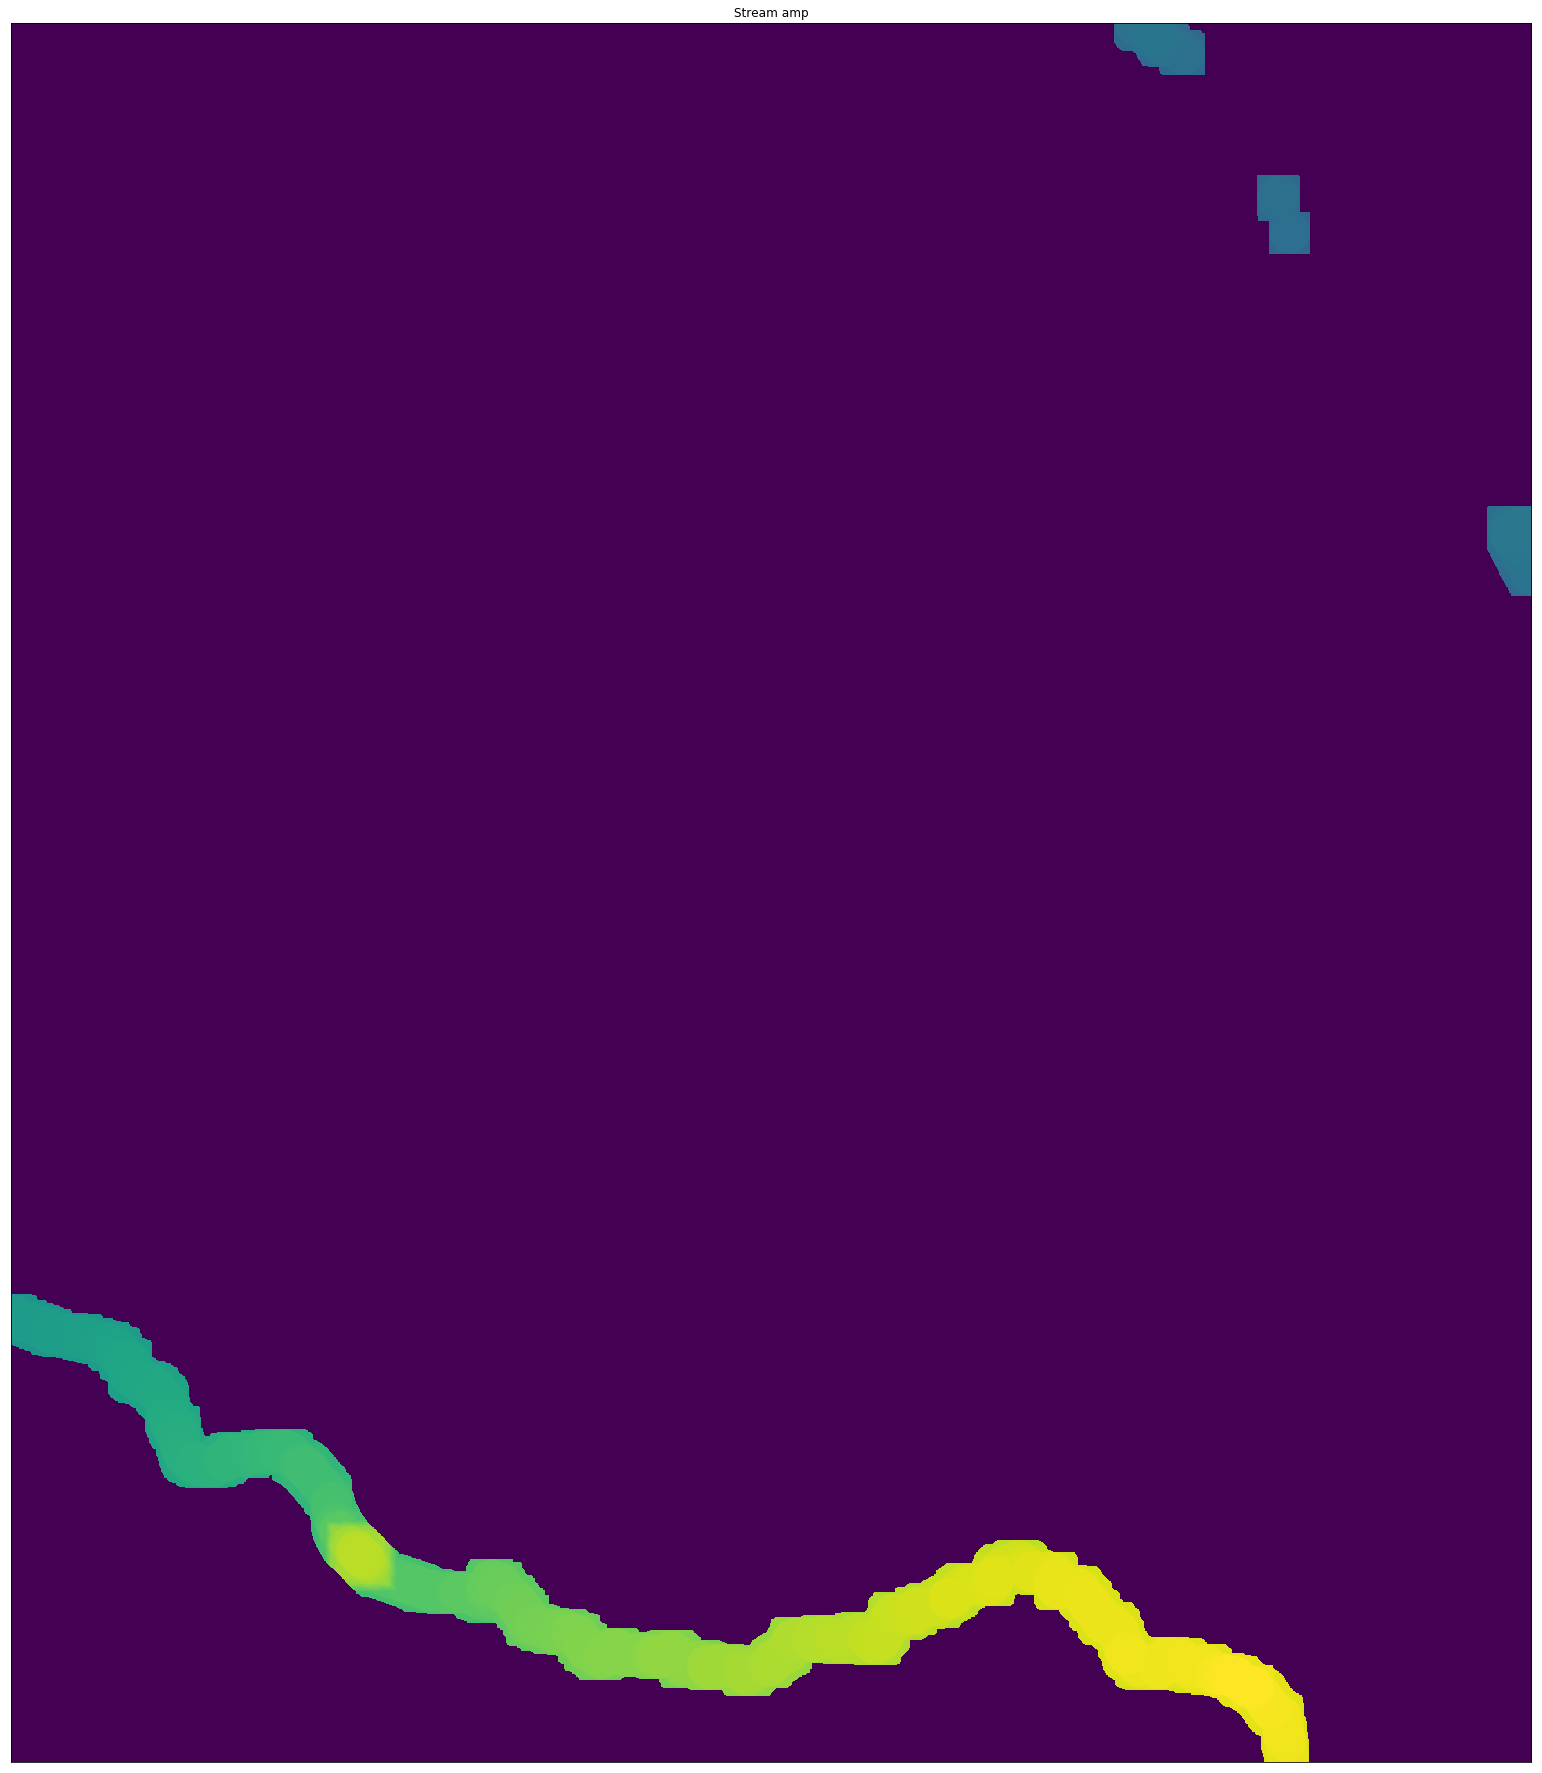

In [10]:
plt.figure(num=None, figsize=(28,32), facecolor='w', edgecolor='k')
ax = [plt.subplot(1,1,i+1) for i in range(1)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0.1)

ax[0].title.set_text("Stream amp")
ax[0].imshow(smoothedOut)

In [11]:
np.amax(smoothedOut)

1.0

In [12]:
smoothedOut.shape

(2997, 2620)

In [13]:
impFilter = fastHelpers.impoundmentAmplification(impoundment)

In [14]:
np.median(impFilter)

17565.305

In [15]:
impFilter.shape

(2997, 2620)

In [16]:
impFilter

array([[ 12102.24609375,  12102.24609375,  12102.24609375, ...,
          4319.35351562,   4310.82128906,   4310.82128906],
       [ 12102.24609375,  12102.24609375,  12102.24609375, ...,
          4310.82128906,   4310.82128906,   4302.46875   ],
       [ 12102.69628906,  12102.69628906,  12102.69628906, ...,
          4302.46875   ,   4302.46875   ,   4282.00976562],
       ..., 
       [ 82243.015625  ,  82214.21875   ,  82185.4296875 , ...,
          6275.03320312,   6275.03320312,   6275.03320312],
       [ 82587.375     ,  82558.09375   ,  82524.625     , ...,
          6270.77441406,   6270.77441406,   6270.77441406],
       [ 82616.65625   ,  82616.65625   ,  82587.375     , ...,
          6270.77441406,   6270.77441406,   6270.77441406]], dtype=float32)

In [18]:
#conicStreamRemoval = helpers.skyViewStreamRemoval(conicFilter, smoothedOut)
#impStreamRemoval = impFilter.copy()
#for i in range(len(impStreamRemoval)):
#    for j in range(len(impStreamRemoval[i])):
#        if smoothedOut[i][j] != 0:
#            impStreamRemoval[i][j] *= (1 - smoothedOut[i][j] if smoothedOut[i][j] > 0.7 else 0.3)
            
impStreamRemoval = helpers.impoundmentStreamRemoval(impFilter, smoothedOut)

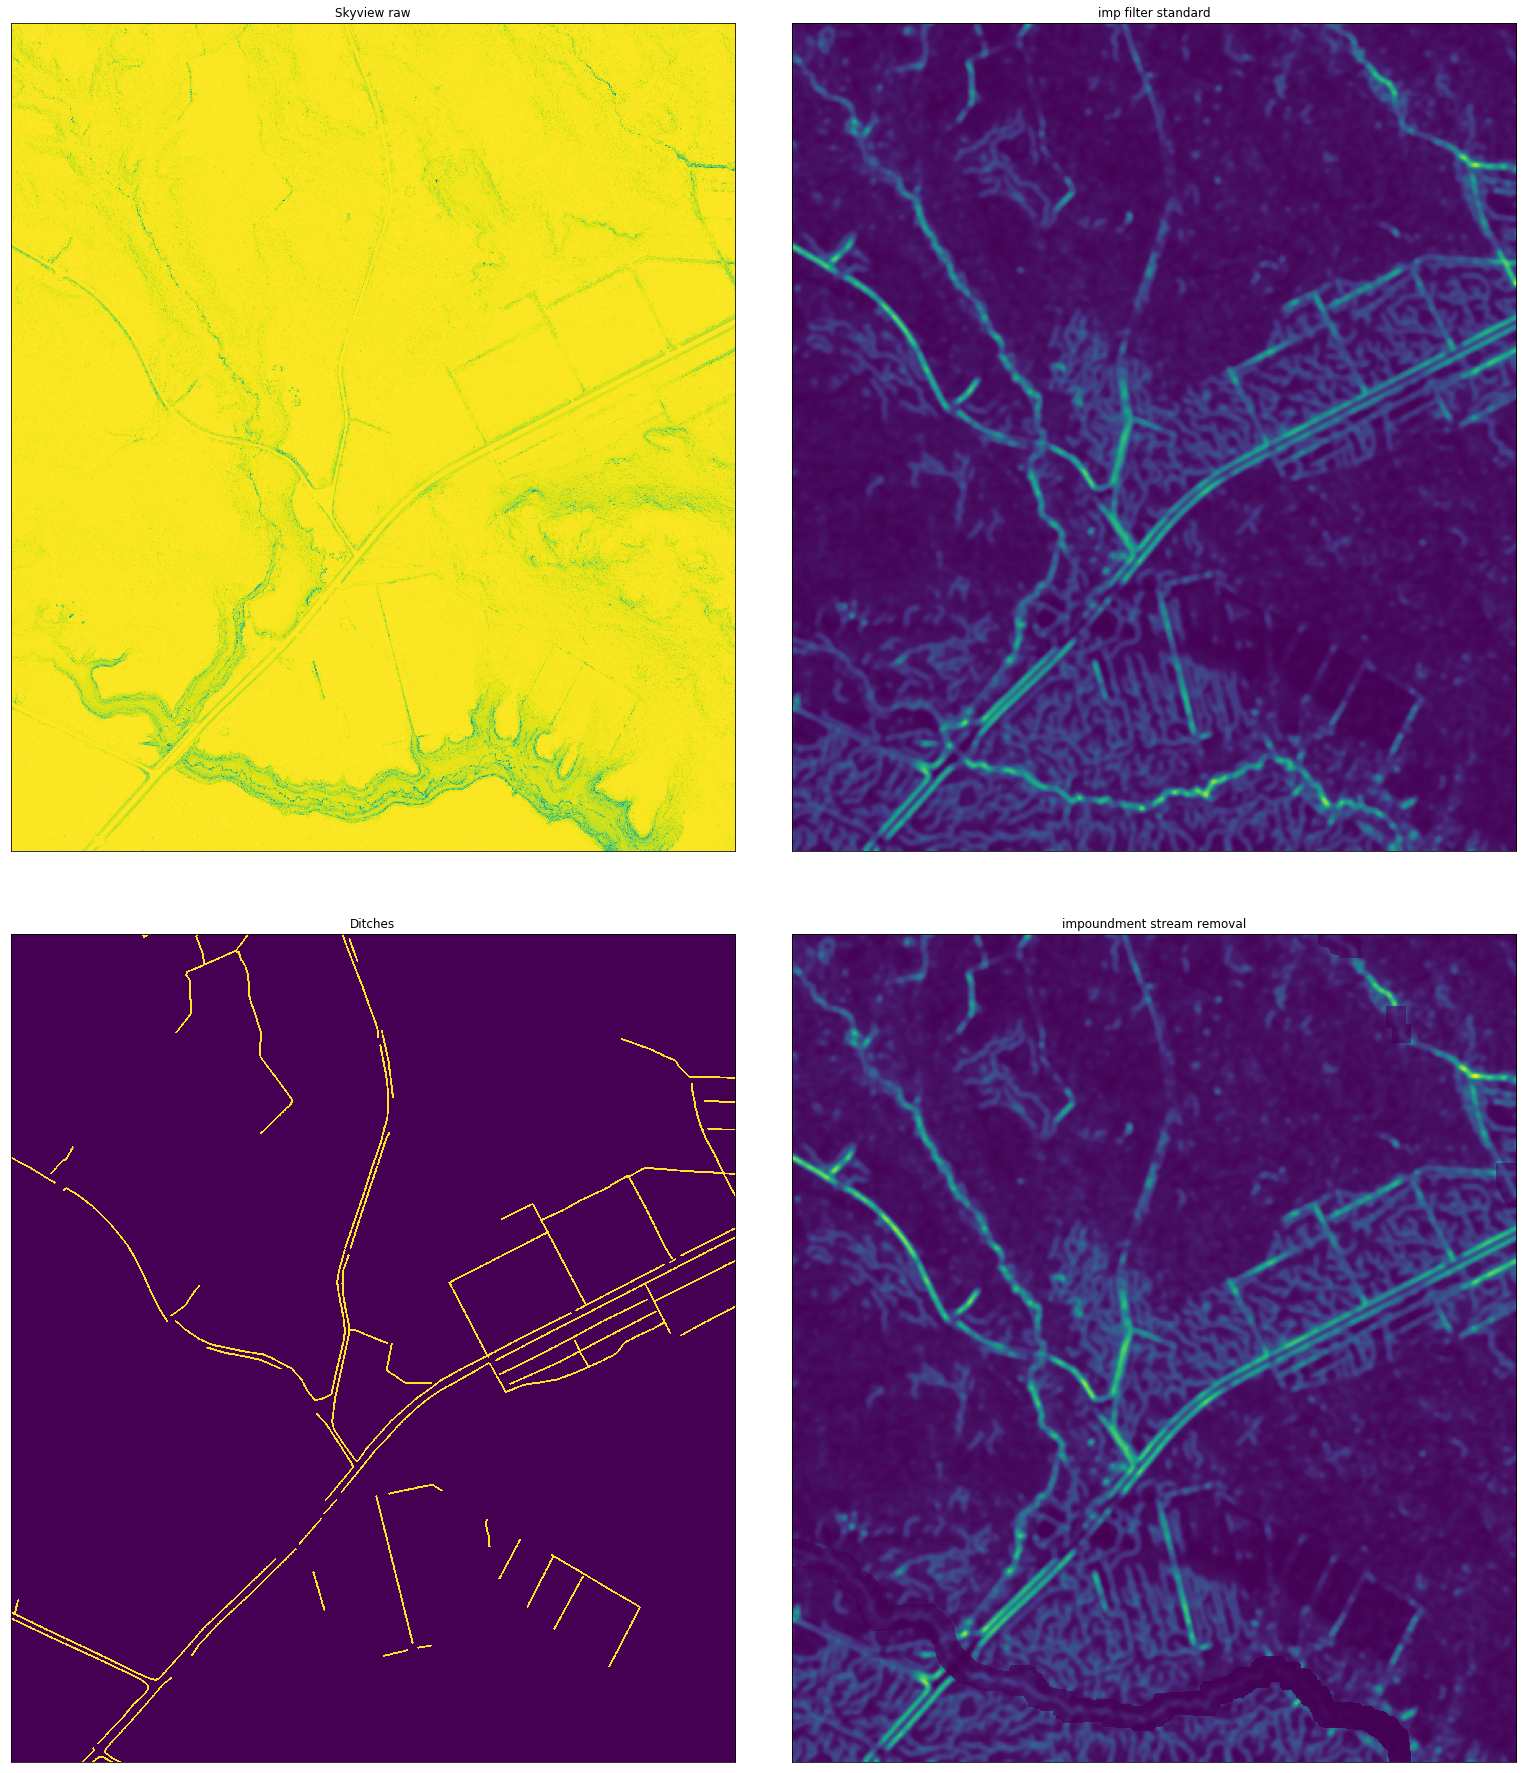

In [19]:
plt.figure(num=None, figsize=(28,32), facecolor='w', edgecolor='k')
ax = [plt.subplot(2,2,i+1) for i in range(4)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0.1)

ax[0].title.set_text("Skyview raw")
ax[0].imshow(skyView)
ax[1].title.set_text("imp filter standard")
ax[1].imshow(impFilter)
ax[2].title.set_text("Ditches")
ax[2].imshow(ditches)
ax[3].title.set_text("impoundment stream removal")
ax[3].imshow(impStreamRemoval)